# Atividade Prática - Árvore de decisão 

O Objetivo deste notebook é utilizar um modelo de árvore de decisão para tentar prever a propensão dos usuários a comprar um e-reader com base em suas características.

  - Disciplina: Machine Learning
  - Professor: Hugo de Paula
  - Aluno: Pedro Henrique Rodrigues de Lima


## 1. Importação das bibliotecas e leitura dos datasets

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import plot_tree 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt


In [2]:
df_treino_compl = pd.read_excel(r'C:\Users\pedro\OneDrive\Pós\9.Machine Learning\Aula 2 - Arvore de decisao\Atividade pratica arvore\Atividade - Arvore de decisao - Bases.xlsx', sheet_name="TREINAMENTO")
df_teste = pd.read_excel(r'C:\Users\pedro\OneDrive\Pós\9.Machine Learning\Aula 2 - Arvore de decisao\Atividade pratica arvore\Atividade - Arvore de decisao - Bases.xlsx', sheet_name="VALIDAÇÃO")

In [3]:
print("Tamanho do dataset de treino:{}".format(df_treino_compl.shape))
print("Tamanho do dataset de teste:{}".format(df_teste.shape))

Tamanho do dataset de treino:(661, 11)
Tamanho do dataset de teste:(473, 10)


In [4]:
df_treino_compl.sample(5)

,ID_usuário,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento,Adoção_eReader
524,6931,M,58,C,Esporádico,Sim,Não,Sim,Não,Cartão de crédito,Late Majority
24,3369,F,48,S,Esporádico,Sim,Sim,Não,Não,Website,Late Majority
252,2791,F,49,C,Intermitente,Não,Sim,Sim,Não,Cartão de crédito,Early Adopter
354,3581,M,27,C,Intermitente,Sim,Não,Não,Não,Transferência,Innovator
557,3741,M,28,C,Esporádico,Sim,Não,Sim,Sim,Website,Late Majority


## 2. Análise exploratória rápida do dataset de treino

In [5]:
df_treino_X = df_treino_compl.drop(['ID_usuário','Adoção_eReader'],axis = 1)
df_treino_y = df_treino_compl[['Adoção_eReader']]

In [6]:
print(df_treino_X.describe(include = 'all'), sep='\n')

       Gênero       Idade Estado_civil Atividade_no_site  \
count     661  661.000000          661               661   
unique      2         NaN            2                 3   
top         M         NaN            C        Esporádico   
freq      346         NaN          381               424   
mean      NaN   42.794251          NaN               NaN   
std       NaN   13.861983          NaN               NaN   
min       NaN   16.000000          NaN               NaN   
25%       NaN   32.000000          NaN               NaN   
50%       NaN   44.000000          NaN               NaN   
75%       NaN   55.000000          NaN               NaN   
max       NaN   66.000000          NaN               NaN   

       Pesquisou_eletronicos_12m Comprou_eletronicos_12m  \
count                        661                     661   
unique                         2                       2   
top                          Sim                     Sim   
freq                         613       

In [7]:
df_treino_y.describe()

,Adoção_eReader
count,661
unique,4
top,Early Adopter
freq,205


<AxesSubplot:title={'center':'Adoção eReader'}, ylabel='Adoção_eReader'>

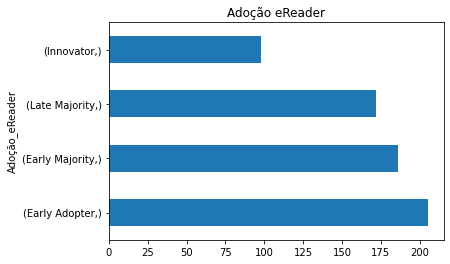

In [8]:
df_treino_y.value_counts().plot(kind = 'barh', title = 'Adoção eReader')

## 3. Transformando o dataset de treino

In [9]:
def prep_df(df):
    df_cat = df.select_dtypes(include = "object")
    df_cat_dummies = pd.get_dummies(df_cat)
    df_int = df.select_dtypes(include = 'int64')
    df_preped = pd.concat([df_int,df_cat_dummies],axis = 1)
    return df_preped


In [10]:
df_treino_X = prep_df(df_treino_X)

## 4. Treinando o modelo

**Train test split**

In [11]:
df_treino_X_train, df_treino_X_val, df_treino_y_train, df_treino_y_val = train_test_split(df_treino_X, df_treino_y, test_size=0.2,random_state = 42)

**Treinando modelo com 80% do dataset 'treinamento'**
Medidas para redução do overfitting:
  - min_impurity_decrease = 0.01 para evitar que sejam feitos "splits" que não contribuam para a classificação dos dados
  - max_depth = 3, para reduzir o tamanho e a complexidade da árvore

In [12]:
model_tree_class = DecisionTreeClassifier(criterion='entropy',splitter = "best",min_impurity_decrease=0.01, max_depth = 3) 
model_tree_class.fit(df_treino_X_train,df_treino_y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3,
                       min_impurity_decrease=0.01)

**Resultado do modelo com os mesmos dados em que ele foi treinado**

In [13]:
model_tree_class.score(df_treino_X_train,df_treino_y_train)

0.6117424242424242

**Teste do modelo com os outros 20% do dataset "TREINAMENTO"**
  - Notamos que não há muito overfitting, já que a accuracy foi bem próxima da accuracy utilizando os dados de treinamento

In [14]:
val_pred = model_tree_class.predict(df_treino_X_val)

In [15]:
accuracy_score(df_treino_y_val, val_pred)

0.6015037593984962

In [16]:
print(classification_report(df_treino_y_val, val_pred))

                precision    recall  f1-score   support

 Early Adopter       0.54      0.79      0.64        47
Early Majority       0.62      0.14      0.23        35
     Innovator       0.52      0.61      0.56        18
 Late Majority       0.75      0.82      0.78        33

      accuracy                           0.60       133
     macro avg       0.61      0.59      0.56       133
  weighted avg       0.61      0.60      0.56       133



## 5. Plotando a árvore

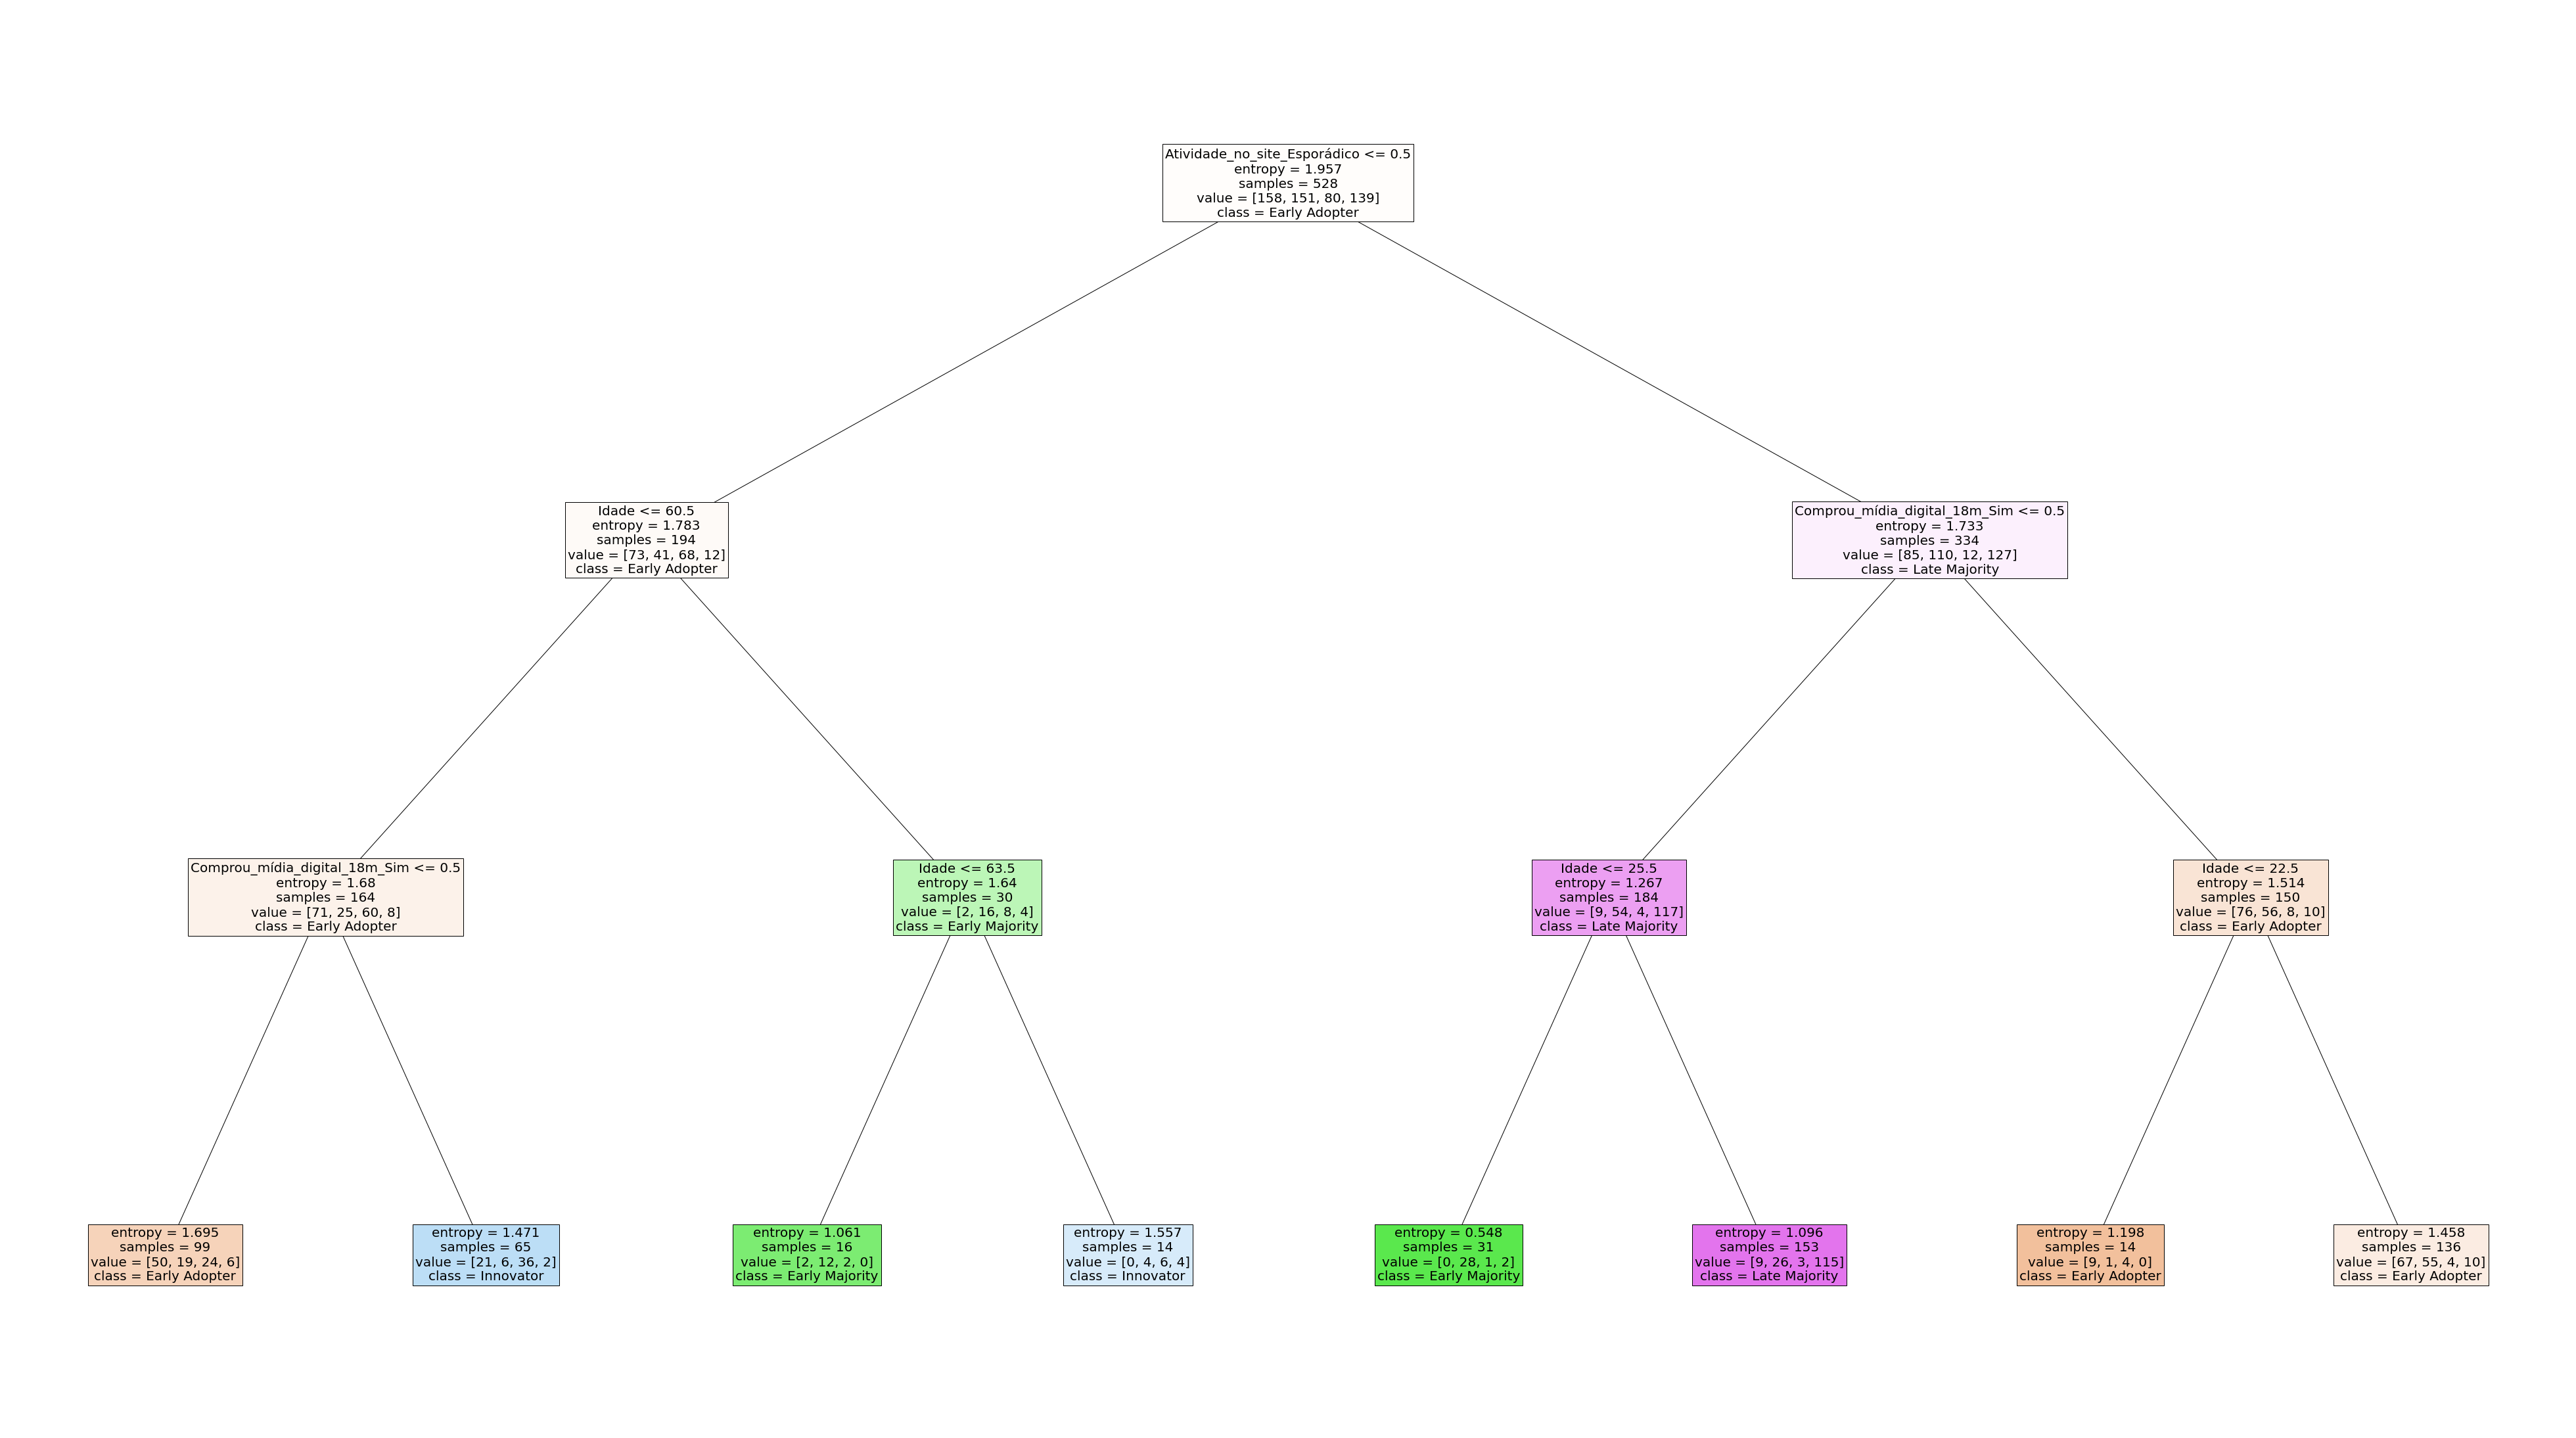

In [17]:
fig1 = plt.figure(figsize = (70,40))
ax1 = fig1.add_subplot()

_ = plot_tree(model_tree_class, ax = ax1,fontsize  = 20 ,feature_names = df_treino_X_val.columns, filled = True, class_names = ['Early Adopter', 'Early Majority', 'Innovator', 'Late Majority'])

In [18]:
pd.DataFrame(model_tree_class.predict(df_treino_X_train))[0].value_counts()

Early Adopter     249
Late Majority     153
Innovator          79
Early Majority     47
Name: 0, dtype: int64

## 6. Prevendo os valores do dataset de teste (aba "VALIDAÇÃO" do arquivo excel)

In [19]:
df_teste = df_teste.drop('ID_usuário',axis = 1)
df_teste = prep_df(df_teste)

In [20]:
df_teste_prediction = model_tree_class.predict(df_teste)

In [21]:
df_teste_prediction

array(['Innovator', 'Early Adopter', 'Late Majority', 'Innovator',
       'Late Majority', 'Innovator', 'Late Majority', 'Early Adopter',
       'Early Adopter', 'Early Majority', 'Early Adopter',
       'Early Majority', 'Early Adopter', 'Early Majority', 'Innovator',
       'Innovator', 'Early Majority', 'Late Majority', 'Late Majority',
       'Early Adopter', 'Late Majority', 'Early Adopter', 'Early Adopter',
       'Late Majority', 'Early Adopter', 'Late Majority', 'Innovator',
       'Innovator', 'Early Adopter', 'Early Adopter', 'Innovator',
       'Early Adopter', 'Early Adopter', 'Late Majority', 'Late Majority',
       'Early Adopter', 'Early Adopter', 'Early Adopter', 'Late Majority',
       'Late Majority', 'Early Adopter', 'Early Adopter',
       'Early Majority', 'Early Adopter', 'Early Adopter',
       'Early Adopter', 'Late Majority', 'Late Majority', 'Early Adopter',
       'Innovator', 'Innovator', 'Early Adopter', 'Innovator',
       'Innovator', 'Late Majority', 'Ea